# Multiple Linear Regression Lab

## Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## Load the data

In [2]:
df = pd.read_csv('kc_house_data_train.csv')
df.head(10)

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,2591820310,20141006T000000,365000.000,4,2.250,2070,8893,2.000,0,...,8,2070,0,1986,0,98058,47.439,-122.162,2390,7700
1,1,7974200820,20140821T000000,865000.000,5,3.000,2900,6730,1.000,0,...,8,1830,1070,1977,0,98115,47.678,-122.285,2370,6283
2,2,7701450110,20140815T000000,1038000.000,4,2.500,3770,10893,2.000,0,...,11,3770,0,1997,0,98006,47.565,-122.129,3710,9685
3,3,9522300010,20150331T000000,1490000.000,3,3.500,4560,14608,2.000,0,...,12,4560,0,1990,0,98034,47.700,-122.228,4050,14226
4,4,9510861140,20140714T000000,711000.000,3,2.500,2550,5376,2.000,0,...,9,2550,0,2004,0,98052,47.665,-122.083,2250,4050
5,5,1761300310,20140827T000000,211000.000,4,2.000,1710,8288,1.500,0,...,7,1710,0,1970,0,98031,47.395,-122.174,1710,7200
6,6,7732410120,20140819T000000,790000.000,4,2.500,2690,8036,2.000,0,...,9,2690,0,1987,0,98007,47.660,-122.144,2420,8087
7,7,7010701383,20141017T000000,680000.000,3,2.500,1800,4400,1.000,0,...,7,1350,450,1970,0,98199,47.660,-122.396,1920,4400
8,8,291310170,20140804T000000,384500.000,3,2.500,1600,2610,2.000,0,...,8,1600,0,2005,0,98027,47.534,-122.068,1445,1288
9,9,4232901990,20140516T000000,605000.000,2,1.000,910,3600,1.000,0,...,7,910,0,1909,0,98119,47.634,-122.361,1720,3600


In [3]:
df.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,17290.000,17290.000,17290.000,17290.000,17290.000,17290.000,17290.000,17290.000,17290.000,17290.000,...,17290.000,17290.000,17290.000,17290.000,17290.000,17290.000,17290.000,17290.000,17290.000,17290.000
mean,8644.500,4565501756.437,540739.549,3.372,2.112,2081.465,15243.400,1.490,0.008,0.239,...,7.654,1789.306,292.159,1970.792,83.806,98078.193,47.560,-122.214,1987.987,12873.476
std,4991.337,2874655595.362,373318.979,0.939,0.770,920.019,42304.624,0.539,0.089,0.775,...,1.175,829.265,443.152,29.344,400.329,53.608,0.138,0.141,684.803,27227.438
min,0.000,1000102.000,75000.000,0.000,0.000,290.000,572.000,1.000,0.000,0.000,...,1.000,290.000,0.000,1900.000,0.000,98001.000,47.156,-122.519,399.000,659.000
25%,4322.250,2114700558.750,321000.000,3.000,1.500,1430.000,5081.250,1.000,0.000,0.000,...,7.000,1200.000,0.000,1951.000,0.000,98033.000,47.471,-122.329,1490.000,5111.250
50%,8644.500,3903650042.500,450000.000,3.000,2.250,1920.000,7642.000,1.500,0.000,0.000,...,7.000,1560.000,0.000,1974.000,0.000,98065.000,47.572,-122.230,1840.000,7622.500
75%,12966.750,7301150051.500,645000.000,4.000,2.500,2550.000,10725.750,2.000,0.000,0.000,...,8.000,2214.500,560.000,1996.000,0.000,98118.000,47.678,-122.126,2360.000,10101.750
max,17289.000,9900000190.000,7700000.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,...,13.000,9410.000,4820.000,2015.000,2015.000,98199.000,47.778,-121.315,6210.000,858132.000


In [4]:
df.shape

(17290, 22)

In [5]:
df.columns

Index(['Unnamed: 0', 'id', 'date', 'price', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

## Declare the dependent and independent variables

In [6]:
target = df['price']
features = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view' , 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']]

## Standardization / Scaling

In [7]:
scaler = StandardScaler()

In [8]:
scaler.fit(features)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [9]:
features_scaled = scaler.transform(features)
features_scaled


array([[ 0.66806994,  0.17918873, -0.01246164, ...,  0.37101341,
         0.58706685, -0.19001514],
       [ 1.73267171,  1.15264072,  0.88972019, ..., -0.50223539,
         0.55786051, -0.24205974],
       [ 0.66806994,  0.50367273,  1.83538065, ...,  0.60529967,
         2.51468528, -0.11710863],
       ...,
       [-0.39653183, -1.44323124, -1.12116701, ..., -0.33894497,
        -0.33293285, -0.12746613],
       [-0.39653183, -0.79426325, -0.19724586, ...,  1.59214181,
         0.13436859,  3.49490383],
       [-0.39653183, -0.79426325, -0.81681651, ..., -0.74362124,
        -0.97547232, -0.21903083]])

## EDA

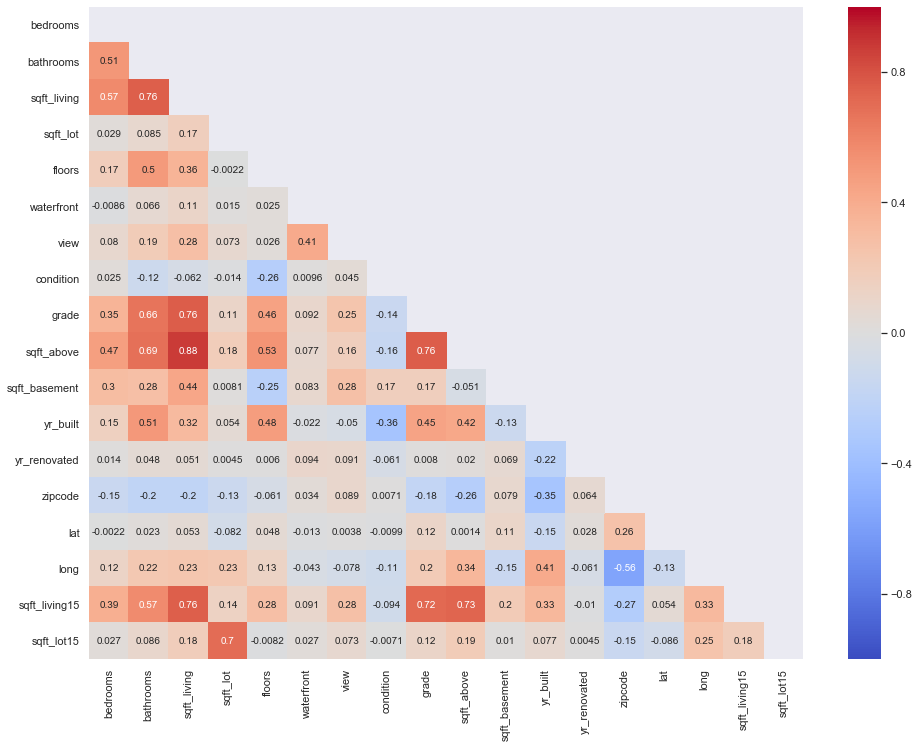

In [10]:
f, ax = plt.subplots(figsize=(16, 12))
matrix = np.triu(features.corr())
sns.heatmap(features.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', mask = matrix)

In [11]:
df.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,17290.000,17290.000,17290.000,17290.000,17290.000,17290.000,17290.000,17290.000,17290.000,17290.000,...,17290.000,17290.000,17290.000,17290.000,17290.000,17290.000,17290.000,17290.000,17290.000,17290.000
mean,8644.500,4565501756.437,540739.549,3.372,2.112,2081.465,15243.400,1.490,0.008,0.239,...,7.654,1789.306,292.159,1970.792,83.806,98078.193,47.560,-122.214,1987.987,12873.476
std,4991.337,2874655595.362,373318.979,0.939,0.770,920.019,42304.624,0.539,0.089,0.775,...,1.175,829.265,443.152,29.344,400.329,53.608,0.138,0.141,684.803,27227.438
min,0.000,1000102.000,75000.000,0.000,0.000,290.000,572.000,1.000,0.000,0.000,...,1.000,290.000,0.000,1900.000,0.000,98001.000,47.156,-122.519,399.000,659.000
25%,4322.250,2114700558.750,321000.000,3.000,1.500,1430.000,5081.250,1.000,0.000,0.000,...,7.000,1200.000,0.000,1951.000,0.000,98033.000,47.471,-122.329,1490.000,5111.250
50%,8644.500,3903650042.500,450000.000,3.000,2.250,1920.000,7642.000,1.500,0.000,0.000,...,7.000,1560.000,0.000,1974.000,0.000,98065.000,47.572,-122.230,1840.000,7622.500
75%,12966.750,7301150051.500,645000.000,4.000,2.500,2550.000,10725.750,2.000,0.000,0.000,...,8.000,2214.500,560.000,1996.000,0.000,98118.000,47.678,-122.126,2360.000,10101.750
max,17289.000,9900000190.000,7700000.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,...,13.000,9410.000,4820.000,2015.000,2015.000,98199.000,47.778,-121.315,6210.000,858132.000


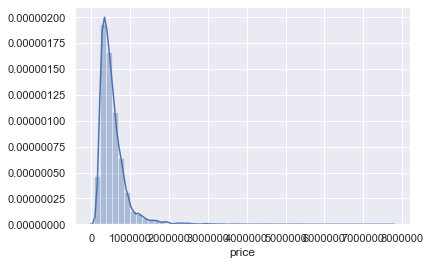

In [12]:
sns.distplot(df['price'])

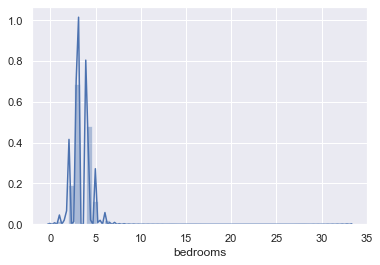

In [13]:
sns.distplot(df['bedrooms'])

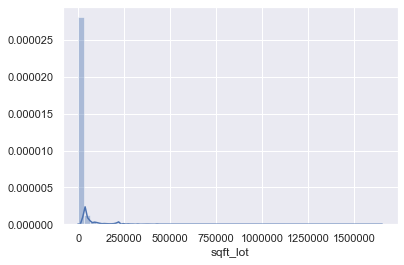

In [14]:
sns.distplot(df['sqft_lot'])

## Train test split

In [15]:
# call train_test_split on the data and capture the results
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=42,test_size=0.2)

#check the shape of the results
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Training set - Features: ", X_test.shape, "Target: ",y_test.shape)


Training set - Features:  (13832, 18) Target:  (13832,)
Training set - Features:  (3458, 18) Target:  (3458,)


## Create the multiple linear regression

### Multiple Regression - 1 (all features, no pre-processing)

#### Training data

In [16]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Get coefficients

In [17]:
reg.coef_

array([-3.50737836e+04,  4.15613716e+04,  1.14880014e+02,  1.21741647e-01,
        5.33302711e+03,  5.87707001e+05,  5.23158323e+04,  2.83740954e+04,
        9.50253181e+04,  7.42750424e+01,  4.06049716e+01, -2.63746119e+03,
        1.78858374e+01, -5.67978080e+02,  6.03371561e+05, -2.18862494e+05,
        1.90650772e+01, -3.54015893e-01])

#### Get intercept

In [18]:
reg.intercept_

4760536.413804755

#### Feature summary and weights

In [19]:
features_df = pd.DataFrame(data = features.columns.values, columns=['Features'])
features_df

,Features
0,bedrooms
1,bathrooms
2,sqft_living
3,sqft_lot
4,floors
5,waterfront
6,view
7,condition
8,grade
9,sqft_above


In [20]:
p_values = f_regression(X_train,y_train)[1]
p_values

array([1.10680784e-301, 0.00000000e+000, 0.00000000e+000, 8.41668610e-024,
       4.15765685e-208, 1.94648933e-238, 0.00000000e+000, 2.37560983e-007,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 5.33231772e-011,
       4.01878922e-043, 2.97836698e-010, 8.58463169e-285, 9.98917319e-003,
       0.00000000e+000, 1.17572027e-019])

In [21]:
features_df['Weights'] = reg.coef_
features_df['P Values'] = p_values.round(3)
features_df.sort_values(['Weights'], ascending=False)

,Features,Weights,P Values
14,lat,603371.561,0.000
5,waterfront,587707.001,0.000
8,grade,95025.318,0.000
6,view,52315.832,0.000
1,bathrooms,41561.372,0.000
7,condition,28374.095,0.000
4,floors,5333.027,0.000
2,sqft_living,114.880,0.000
9,sqft_above,74.275,0.000
10,sqft_basement,40.605,0.000


#### Get r^2 score and adjusted r^2 score

In [22]:
r2_train = reg.score(X_train, y_train)
r2_train

0.6970071254200643

In [23]:
n = X_train.shape[0]
p = X_train.shape[1]

adjusted_r2_train = 1-(1-r2_train)*(n-1)/(n-p-1)
adjusted_r2_train

0.696612289269884

#### Get error

In [24]:
y_train_pred = reg.predict(X_train)

In [25]:
train_mae = metrics.mean_absolute_error(y_train, y_train_pred)
train_mse = metrics.mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))

print('Mean Absolute Error:', train_mae )
print('Mean Squared Error:',  train_mse)
print('Root Mean Squared Error:' , train_rmse)

Mean Absolute Error: 127865.68450145549
Mean Squared Error: 42696724677.65792
Root Mean Squared Error: 206631.85784785927


In [26]:
price_std = target.std()

print('Mean Absolute Error:', train_mae/price_std )
print('Root Mean Squared Error:' , train_rmse/price_std)

Mean Absolute Error: 0.34251053865474385
Root Mean Squared Error: 0.5534994725961454


#### Test Data

In [27]:
reg.score(X_test, y_test)

0.7027786929887361

In [28]:
r2_test = reg.score(X_test, y_test)
n = X_test.shape[0]
p = X_test.shape[1]

adjusted_r2_test = 1-(1-r2_test)*(n-1)/(n-p-1)
adjusted_r2_test

0.7012230129869325

In [29]:
y_test_pred = reg.predict(X_test)

In [30]:
test_mae = metrics.mean_absolute_error(y_test, y_test_pred)
test_mse = metrics.mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

print('Mean Absolute Error:', test_mae )
print('Mean Squared Error:',  test_mse)
print('Root Mean Squared Error:' , test_rmse)

Mean Absolute Error: 123704.29845358018
Mean Squared Error: 39547299966.78218
Root Mean Squared Error: 198865.02952199057


In [31]:
print('Mean Absolute Error  Z:', test_mae/price_std )
print('Root Mean Squared Error Z:' , test_rmse/price_std)

Mean Absolute Error  Z: 0.33136354028402865
Root Mean Squared Error Z: 0.5326946682117296


In [32]:
cv = float(format(cross_val_score(reg,features,target,cv=5).mean(),'.3f'))
cv

0.697

Text(0, 0.5, 'Predictions')

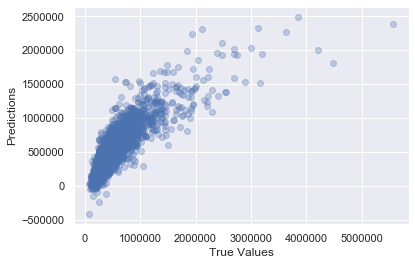

In [33]:
plt.scatter(y_test, y_test_pred, alpha=0.3)
plt.xlabel("True Values")
plt.ylabel("Predictions")

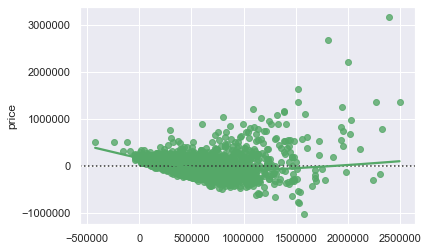

In [34]:
sns.residplot(y_test_pred, y_test, lowess=True, color="g")

In [35]:
summary_df = pd.DataFrame(columns=['Model', 'Description','Root Mean Squared Error (RMSE)', 'R-squared (training)', 'Adjusted R-squared (training)','R-squared (test)', 'Adjusted R-squared (test)', '5-fold Cross Validation'])
summary_df

,Model,Description,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-fold Cross Validation


In [36]:
r2_test

0.7027786929887361

#### Updated summary table of all models

In [37]:
summary_df = summary_df.append({'Model' : 'Multiple Regression-1', 'Description' : 'All features, no pre-processing' , 'Root Mean Squared Error (RMSE)' : train_rmse, 'R-squared (training)' : r2_train, 'Adjusted R-squared (training)': adjusted_r2_train, 'R-squared (test)' : r2_test, 'Adjusted R-squared (test)' : adjusted_r2_test, '5-fold Cross Validation' : cv} , ignore_index=True)
summary_df

,Model,Description,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-fold Cross Validation
0,Multiple Regression-1,"All features, no pre-processing",206631.858,0.697,0.697,0.703,0.701,0.697


In [38]:
model = sm.OLS(target, features)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.903
Model:                            OLS   Adj. R-squared (uncentered):              0.902
Method:                 Least Squares   F-statistic:                              9413.
Date:                Sat, 21 Mar 2020   Prob (F-statistic):                        0.00
Time:                        11:39:02   Log-Likelihood:                     -2.3601e+05
No. Observations:               17290   AIC:                                  4.721e+05
Df Residuals:                   17273   BIC:                                  4.722e+05
Df Model:                          17                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bedrooms      -3.611e+04   2113.128    -17.086      0.000   -4.02e+04    -3.2e+04
bathrooms      4.119e+04   3700.276     11.131      0.000    3.39e+04    4.84e+04
sqft_living     114.1225      2.573     44.362      0.000     109.080     119.165
sqft_lot          0.1076      0.052      2.062      0.039       0.005       0.210
floors         4631.0071   4033.232      1.148      0.251   -3274.536    1.25e+04
waterfront     5.949e+05   1.93e+04     30.811      0.000    5.57e+05    6.33e+05
view           5.216e+04   2401.836     21.718      0.000    4.75e+04    5.69e+04
condition      2.681e+04   2640.670     10.154      0.000    2.16e+04     3.2e+04
grade            9.5e+04   2451.049     38.758      0.000    9.02e+04    9.98e+04
sqft_above       73.5538      2.559     28.743      0.000      68.538      78.570
sqft_basement    40.5688      2.983     13.599      0.000      34.721      46.416
yr_built      -2614.0677     77.361    -33.791      0.000   -2765.703   -2462.433
yr_renovated     17.8591      4.164      4.289      0.000       9.697      26.021
zipcode        -524.0343     20.215    -25.923      0.000    -563.658    -484.411
lat            6.017e+05   1.22e+04     49.201      0.000    5.78e+05    6.26e+05
long          -2.229e+05   1.48e+04    -15.047      0.000   -2.52e+05   -1.94e+05
sqft_living15    22.9995      3.870      5.942      0.000      15.413      30.586
sqft_lot15       -0.3157      0.082     -3.858      0.000      -0.476      -0.155
==============================================================================
Omnibus:                    15326.214   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1735225.168
Skew:                           3.784   Prob(JB):                         0.00
Kurtosis:                      51.491   Cond. No.                     4.76e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.75e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Multiple Regression - 2 (without sqft_above)

In [39]:
target = df['price']
features = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view' , 'condition', 'grade', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']]

In [40]:
scaler.fit(features)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [41]:
features_scaled = scaler.transform(features)
features_scaled


array([[ 0.66806994,  0.17918873, -0.01246164, ...,  0.37101341,
         0.58706685, -0.19001514],
       [ 1.73267171,  1.15264072,  0.88972019, ..., -0.50223539,
         0.55786051, -0.24205974],
       [ 0.66806994,  0.50367273,  1.83538065, ...,  0.60529967,
         2.51468528, -0.11710863],
       ...,
       [-0.39653183, -1.44323124, -1.12116701, ..., -0.33894497,
        -0.33293285, -0.12746613],
       [-0.39653183, -0.79426325, -0.19724586, ...,  1.59214181,
         0.13436859,  3.49490383],
       [-0.39653183, -0.79426325, -0.81681651, ..., -0.74362124,
        -0.97547232, -0.21903083]])

#### Training data

In [42]:
# call train_test_split on the data and capture the results
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=42,test_size=0.2)

#check the shape of the results
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Training set - Features: ", X_test.shape, "Target: ",y_test.shape)


Training set - Features:  (13832, 17) Target:  (13832,)
Training set - Features:  (3458, 17) Target:  (3458,)


In [43]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Get coefficients

In [44]:
reg.coef_

array([-3.50737836e+04,  4.15613716e+04,  1.89155056e+02,  1.21741647e-01,
        5.33302711e+03,  5.87707001e+05,  5.23158323e+04,  2.83740954e+04,
        9.50253181e+04, -3.36700709e+01, -2.63746119e+03,  1.78858374e+01,
       -5.67978080e+02,  6.03371561e+05, -2.18862494e+05,  1.90650772e+01,
       -3.54015893e-01])

#### Get intercept

In [45]:
reg.intercept_

4760536.413778435

#### Feature summary and weights

In [46]:
features_df = pd.DataFrame(data = features.columns.values, columns=['Features'])
features_df

,Features
0,bedrooms
1,bathrooms
2,sqft_living
3,sqft_lot
4,floors
5,waterfront
6,view
7,condition
8,grade
9,sqft_basement


In [47]:
p_values = f_regression(X_train,y_train)[1]
p_values

array([1.10680784e-301, 0.00000000e+000, 0.00000000e+000, 8.41668610e-024,
       4.15765685e-208, 1.94648933e-238, 0.00000000e+000, 2.37560983e-007,
       0.00000000e+000, 0.00000000e+000, 5.33231772e-011, 4.01878922e-043,
       2.97836698e-010, 8.58463169e-285, 9.98917319e-003, 0.00000000e+000,
       1.17572027e-019])

In [48]:
features_df['Weights'] = reg.coef_
features_df['P Values'] = p_values.round(3)
features_df.sort_values(['Weights'], ascending=False)

,Features,Weights,P Values
13,lat,603371.561,0.000
5,waterfront,587707.001,0.000
8,grade,95025.318,0.000
6,view,52315.832,0.000
1,bathrooms,41561.372,0.000
7,condition,28374.095,0.000
4,floors,5333.027,0.000
2,sqft_living,189.155,0.000
15,sqft_living15,19.065,0.000
11,yr_renovated,17.886,0.000


#### Get r^2 score and adjusted r^2 score

In [49]:
r2_train = reg.score(X_train, y_train)
r2_train

0.6970071254200643

In [50]:
n = X_train.shape[0]
p = X_train.shape[1]

adjusted_r2_train = 1-(1-r2_train)*(n-1)/(n-p-1)
adjusted_r2_train

0.6966342516059729

#### Get error

In [51]:
y_train_pred = reg.predict(X_train)

In [52]:
train_mae = metrics.mean_absolute_error(y_train, y_train_pred)
train_mse = metrics.mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))

print('Mean Absolute Error:', train_mae )
print('Mean Squared Error:',  train_mse)
print('Root Mean Squared Error:' , train_rmse)

Mean Absolute Error: 127865.68450147648
Mean Squared Error: 42696724677.65793
Root Mean Squared Error: 206631.8578478593


In [53]:
price_std = target.std()

print('Mean Absolute Error:', train_mae/price_std )
print('Root Mean Squared Error:' , train_rmse/price_std)

Mean Absolute Error: 0.3425105386548001
Root Mean Squared Error: 0.5534994725961455


#### Test Data

In [54]:
reg.score(X_test, y_test)

0.7027786929887473

In [55]:
r2_test = reg.score(X_test, y_test)
n = X_test.shape[0]
p = X_test.shape[1]

adjusted_r2_test = 1-(1-r2_test)*(n-1)/(n-p-1)
adjusted_r2_test

0.7013098667622382

In [56]:
y_test_pred = reg.predict(X_test)

In [57]:
test_mae = metrics.mean_absolute_error(y_test, y_test_pred)
test_mse = metrics.mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

print('Mean Absolute Error:', test_mae )
print('Mean Squared Error:',  test_mse)
print('Root Mean Squared Error:' , test_rmse)

Mean Absolute Error: 123704.29845359799
Mean Squared Error: 39547299966.78069
Root Mean Squared Error: 198865.02952198684


In [58]:
print('Mean Absolute Error  Z:', test_mae/price_std )
print('Root Mean Squared Error Z:' , test_rmse/price_std)

Mean Absolute Error  Z: 0.33136354028407633
Root Mean Squared Error Z: 0.5326946682117196


In [59]:
cv = float(format(cross_val_score(reg,features,target,cv=5).mean(),'.3f'))
cv

0.697

Text(0, 0.5, 'Predictions')

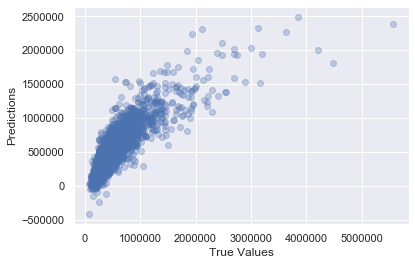

In [60]:
plt.scatter(y_test, y_test_pred, alpha=0.3)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [61]:
r2_test

0.7027786929887473

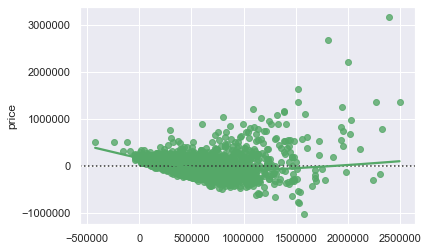

In [62]:
sns.residplot(y_test_pred, y_test, lowess=True, color="g")

#### Updated summary table of all models

In [63]:
summary_df = summary_df.append({'Model' : 'Multiple Regression-2', 'Description' : 'Minus sqft_above' , 'Root Mean Squared Error (RMSE)' : train_rmse, 'R-squared (training)' : r2_train, 'Adjusted R-squared (training)': adjusted_r2_train, 'R-squared (test)' : r2_test, 'Adjusted R-squared (test)' : adjusted_r2_test, '5-fold Cross Validation' : cv} , ignore_index=True)
summary_df

,Model,Description,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-fold Cross Validation
0,Multiple Regression-1,"All features, no pre-processing",206631.858,0.697,0.697,0.703,0.701,0.697
1,Multiple Regression-2,Minus sqft_above,206631.858,0.697,0.697,0.703,0.701,0.697


### Multiple Regression - 3 (all features polynomial 1st degree)

In [64]:
target = df['price']
features = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view' , 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']]

In [65]:
scaler.fit(features)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [66]:
features_scaled = scaler.transform(features)
features_scaled


array([[ 0.66806994,  0.17918873, -0.01246164, ...,  0.37101341,
         0.58706685, -0.19001514],
       [ 1.73267171,  1.15264072,  0.88972019, ..., -0.50223539,
         0.55786051, -0.24205974],
       [ 0.66806994,  0.50367273,  1.83538065, ...,  0.60529967,
         2.51468528, -0.11710863],
       ...,
       [-0.39653183, -1.44323124, -1.12116701, ..., -0.33894497,
        -0.33293285, -0.12746613],
       [-0.39653183, -0.79426325, -0.19724586, ...,  1.59214181,
         0.13436859,  3.49490383],
       [-0.39653183, -0.79426325, -0.81681651, ..., -0.74362124,
        -0.97547232, -0.21903083]])

#### Training data

In [67]:
# call train_test_split on the data and capture the results
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=42,test_size=0.2)

#check the shape of the results
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Training set - Features: ", X_test.shape, "Target: ",y_test.shape)


Training set - Features:  (13832, 18) Target:  (13832,)
Training set - Features:  (3458, 18) Target:  (3458,)


In [68]:
poly = PolynomialFeatures(1)
X_train = poly.fit_transform(X_train)
X_test = poly.fit_transform(X_test)

In [69]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Get coefficients

In [70]:
reg.coef_

array([ 0.00000000e+00, -3.50737836e+04,  4.15613716e+04,  1.14880014e+02,
        1.21741647e-01,  5.33302711e+03,  5.87707001e+05,  5.23158323e+04,
        2.83740954e+04,  9.50253181e+04,  7.42750424e+01,  4.06049715e+01,
       -2.63746119e+03,  1.78858374e+01, -5.67978080e+02,  6.03371561e+05,
       -2.18862494e+05,  1.90650772e+01, -3.54015893e-01])

#### Get intercept

In [71]:
reg.intercept_

4760536.413772289

#### Feature summary and weights

In [72]:
features_df = pd.DataFrame(data = features.columns.values, columns=['Features'])
features_df

,Features
0,bedrooms
1,bathrooms
2,sqft_living
3,sqft_lot
4,floors
5,waterfront
6,view
7,condition
8,grade
9,sqft_above


In [73]:
p_values = f_regression(X_train,y_train)[1]
p_values

array([            nan, 1.10680784e-301, 0.00000000e+000, 0.00000000e+000,
       8.41668610e-024, 4.15765685e-208, 1.94648933e-238, 0.00000000e+000,
       2.37560983e-007, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       5.33231772e-011, 4.01878922e-043, 2.97836698e-010, 8.58462676e-285,
       9.98917263e-003, 0.00000000e+000, 1.17572027e-019])

#### Get r^2 score and adjusted r^2 score

In [74]:
r2_train = reg.score(X_train, y_train)
r2_train

0.6970071254200643

In [75]:
n = X_train.shape[0]
p = X_train.shape[1]

adjusted_r2_train = 1-(1-r2_train)*(n-1)/(n-p-1)
adjusted_r2_train

0.6965903237536135

#### Get error

In [76]:
y_train_pred = reg.predict(X_train)

In [77]:
train_mae = metrics.mean_absolute_error(y_train, y_train_pred)
train_mse = metrics.mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))

print('Mean Absolute Error:', train_mae )
print('Mean Squared Error:',  train_mse)
print('Root Mean Squared Error:' , train_rmse)

Mean Absolute Error: 127865.6845014583
Mean Squared Error: 42696724677.65792
Root Mean Squared Error: 206631.85784785927


In [78]:
price_std = target.std()

print('Mean Absolute Error:', train_mae/price_std )
print('Root Mean Squared Error:' , train_rmse/price_std)

Mean Absolute Error: 0.34251053865475134
Root Mean Squared Error: 0.5534994725961454


#### Test Data

In [79]:
reg.score(X_test, y_test)

0.7027786929887461

In [80]:
r2_test = reg.score(X_test, y_test)
n = X_test.shape[0]
p = X_test.shape[1]

adjusted_r2_test = 1-(1-r2_test)*(n-1)/(n-p-1)
adjusted_r2_test

0.7011361086858916

In [81]:
y_test_pred = reg.predict(X_test)

In [82]:
test_mae = metrics.mean_absolute_error(y_test, y_test_pred)
test_mse = metrics.mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

print('Mean Absolute Error:', test_mae )
print('Mean Squared Error:',  test_mse)
print('Root Mean Squared Error:' , test_rmse)

Mean Absolute Error: 123704.29845358321
Mean Squared Error: 39547299966.78086
Root Mean Squared Error: 198865.02952198725


In [83]:
print('Mean Absolute Error  Z:', test_mae/price_std )
print('Root Mean Squared Error Z:' , test_rmse/price_std)

Mean Absolute Error  Z: 0.33136354028403675
Root Mean Squared Error Z: 0.5326946682117207


In [84]:
cv = float(format(cross_val_score(reg,features,target,cv=5).mean(),'.3f'))
cv

0.697

Text(0, 0.5, 'Predictions')

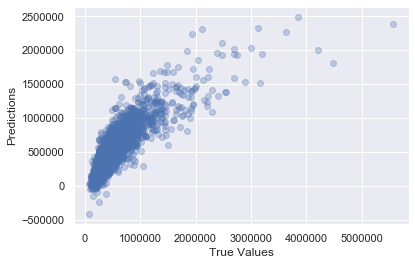

In [85]:
plt.scatter(y_test, y_test_pred, alpha=0.3)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [86]:
r2_test

0.7027786929887461

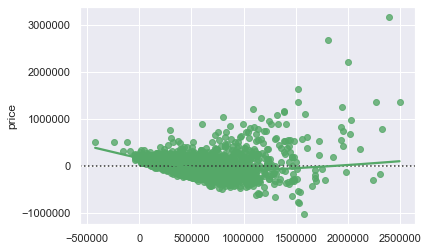

In [87]:
sns.residplot(y_test_pred, y_test, lowess=True, color="g")

#### Updated summary table of all models

In [88]:
summary_df = summary_df.append({'Model' : 'Multiple Regression-3', 'Description' : 'All features 1st degree polynomial' , 'Root Mean Squared Error (RMSE)' : train_rmse, 'R-squared (training)' : r2_train, 'Adjusted R-squared (training)': adjusted_r2_train, 'R-squared (test)' : r2_test, 'Adjusted R-squared (test)' : adjusted_r2_test, '5-fold Cross Validation' : cv} , ignore_index=True)
summary_df

,Model,Description,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-fold Cross Validation
0,Multiple Regression-1,"All features, no pre-processing",206631.858,0.697,0.697,0.703,0.701,0.697
1,Multiple Regression-2,Minus sqft_above,206631.858,0.697,0.697,0.703,0.701,0.697
2,Multiple Regression-3,All features 1st degree polynomial,206631.858,0.697,0.697,0.703,0.701,0.697


### Multiple Regression - 4 (all features polynomial 2nd degree)

In [89]:
target = df['price']
features = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view' , 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']]

In [90]:
scaler.fit(features)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [91]:
features_scaled = scaler.transform(features)
features_scaled


array([[ 0.66806994,  0.17918873, -0.01246164, ...,  0.37101341,
         0.58706685, -0.19001514],
       [ 1.73267171,  1.15264072,  0.88972019, ..., -0.50223539,
         0.55786051, -0.24205974],
       [ 0.66806994,  0.50367273,  1.83538065, ...,  0.60529967,
         2.51468528, -0.11710863],
       ...,
       [-0.39653183, -1.44323124, -1.12116701, ..., -0.33894497,
        -0.33293285, -0.12746613],
       [-0.39653183, -0.79426325, -0.19724586, ...,  1.59214181,
         0.13436859,  3.49490383],
       [-0.39653183, -0.79426325, -0.81681651, ..., -0.74362124,
        -0.97547232, -0.21903083]])

#### Training data

In [92]:
# call train_test_split on the data and capture the results
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=42,test_size=0.2)

#check the shape of the results
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Training set - Features: ", X_test.shape, "Target: ",y_test.shape)


Training set - Features:  (13832, 18) Target:  (13832,)
Training set - Features:  (3458, 18) Target:  (3458,)


In [93]:
poly = PolynomialFeatures(2)
X_train = poly.fit_transform(X_train)
X_test = poly.fit_transform(X_test)

In [94]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Get coefficients

In [95]:
reg.coef_

array([ 5.11121021e+02,  1.07024088e+07, -7.29510557e+06, -3.77220108e+05,
       -1.16308594e+02, -4.10135951e+07,  9.69936678e+07, -2.03661076e+06,
       -1.92970187e+07, -5.69294780e+06,  4.00033468e+05,  3.48824928e+05,
       -2.83497988e+05,  3.15388682e+04, -4.27392894e+05,  8.89938026e+07,
       -4.85243304e+07, -7.51283068e+03,  6.51418444e+02,  1.00573267e+03,
        4.28625003e+03,  4.74673892e+01, -7.72496513e-02,  2.01659591e+04,
        6.28038199e+03, -7.26537704e+02, -4.21702775e+03, -2.44827586e+03,
       -7.36638622e+01, -6.89506619e+01, -2.28404229e+02, -7.06525360e+00,
       -1.30217181e+01, -3.39964932e+04,  6.01713518e+04,  1.48582708e+01,
        3.00278758e-01,  1.04584542e+03,  1.10169856e+01, -5.16324659e-01,
       -3.37461476e+04,  3.60011757e+04,  9.03026791e+03, -9.14392140e+03,
        1.58693801e+04,  1.39829962e+01, -2.75104383e+01,  1.44753194e+02,
       -2.62432991e+01, -9.23696377e+01,  1.00281935e+05, -9.18511045e+04,
       -7.27818470e-01,  

#### Get intercept

In [96]:
reg.intercept_

16225036554.413038

#### Feature summary and weights

In [97]:
features_df = pd.DataFrame(data = features.columns.values, columns=['Features'])
features_df

,Features
0,bedrooms
1,bathrooms
2,sqft_living
3,sqft_lot
4,floors
5,waterfront
6,view
7,condition
8,grade
9,sqft_above


In [98]:
p_values = f_regression(X_train,y_train)[1]
p_values

array([            nan, 1.10680784e-301, 0.00000000e+000, 0.00000000e+000,
       8.41668610e-024, 4.15765685e-208, 1.94648933e-238, 0.00000000e+000,
       2.37560983e-007, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       5.33231772e-011, 4.01878922e-043, 2.97836698e-010, 8.58462676e-285,
       9.98917263e-003, 0.00000000e+000, 1.17572027e-019, 7.10175942e-113,
       0.00000000e+000, 0.00000000e+000, 7.15736178e-046, 0.00000000e+000,
       2.16489823e-301, 0.00000000e+000, 4.07240661e-226, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 4.93190713e-303, 1.03594030e-066,
       1.40122170e-301, 3.54686278e-308, 9.80644110e-302, 0.00000000e+000,
       1.19986234e-048, 0.00000000e+000, 0.00000000e+000, 1.98159763e-080,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       7.87240225e-110, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 1

#### Get r^2 score and adjusted r^2 score

In [99]:
r2_train = reg.score(X_train, y_train)
r2_train

0.8353514863679877

In [100]:
n = X_train.shape[0]
p = X_train.shape[1]

adjusted_r2_train = 1-(1-r2_train)*(n-1)/(n-p-1)
adjusted_r2_train

0.8330581634744988

#### Get error

In [101]:
y_train_pred = reg.predict(X_train)

In [102]:
train_mae = metrics.mean_absolute_error(y_train, y_train_pred)
train_mse = metrics.mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))

print('Mean Absolute Error:', train_mae )
print('Mean Squared Error:',  train_mse)
print('Root Mean Squared Error:' , train_rmse)

Mean Absolute Error: 99082.5439600768
Mean Squared Error: 23201708175.077858
Root Mean Squared Error: 152321.0693734713


In [103]:
price_std = target.std()

print('Mean Absolute Error:', train_mae/price_std )
print('Root Mean Squared Error:' , train_rmse/price_std)

Mean Absolute Error: 0.26540987627264406
Root Mean Squared Error: 0.40801855261628384


#### Test Data

In [104]:
reg.score(X_test, y_test)

0.8122428831023909

In [105]:
r2_test = reg.score(X_test, y_test)
n = X_test.shape[0]
p = X_test.shape[1]

adjusted_r2_test = 1-(1-r2_test)*(n-1)/(n-p-1)
adjusted_r2_test

0.8013234303290375

In [106]:
y_test_pred = reg.predict(X_test)

In [107]:
test_mae = metrics.mean_absolute_error(y_test, y_test_pred)
test_mse = metrics.mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

print('Mean Absolute Error:', test_mae )
print('Mean Squared Error:',  test_mse)
print('Root Mean Squared Error:' , test_rmse)

Mean Absolute Error: 100763.1585746443
Mean Squared Error: 24982351021.579136
Root Mean Squared Error: 158058.0621846894


In [108]:
print('Mean Absolute Error  Z:', test_mae/price_std )
print('Root Mean Squared Error Z:' , test_rmse/price_std)

Mean Absolute Error  Z: 0.2699116956556232
Root Mean Squared Error Z: 0.42338608852468723


In [109]:
cv = float(format(cross_val_score(reg,features,target,cv=5).mean(),'.3f'))
cv

0.697

Text(0, 0.5, 'Predictions')

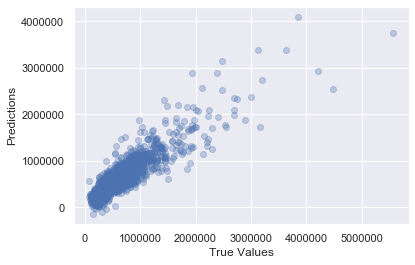

In [110]:
plt.scatter(y_test, y_test_pred, alpha=0.3)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [111]:
r2_test

0.8122428831023909

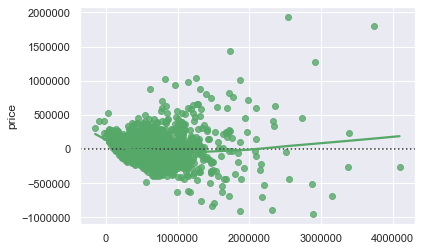

In [112]:
sns.residplot(y_test_pred, y_test, lowess=True, color="g")

#### Updated summary table of all models

In [113]:
summary_df = summary_df.append({'Model' : 'Multiple Regression-4', 'Description' : 'All features, 2nd degree polynomial' , 'Root Mean Squared Error (RMSE)' : train_rmse, 'R-squared (training)' : r2_train, 'Adjusted R-squared (training)': adjusted_r2_train, 'R-squared (test)' : r2_test, 'Adjusted R-squared (test)' : adjusted_r2_test, '5-fold Cross Validation' : cv} , ignore_index=True)
summary_df

,Model,Description,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-fold Cross Validation
0,Multiple Regression-1,"All features, no pre-processing",206631.858,0.697,0.697,0.703,0.701,0.697
1,Multiple Regression-2,Minus sqft_above,206631.858,0.697,0.697,0.703,0.701,0.697
2,Multiple Regression-3,All features 1st degree polynomial,206631.858,0.697,0.697,0.703,0.701,0.697
3,Multiple Regression-4,"All features, 2nd degree polynomial",152321.069,0.835,0.833,0.812,0.801,0.697


### Multiple Regression - 5 (minus sqft_above, polynomial 1st degree)

In [114]:
target = df['price']
features = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view' , 'condition', 'grade', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']]

In [115]:
scaler.fit(features)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [116]:
features_scaled = scaler.transform(features)
features_scaled


array([[ 0.66806994,  0.17918873, -0.01246164, ...,  0.37101341,
         0.58706685, -0.19001514],
       [ 1.73267171,  1.15264072,  0.88972019, ..., -0.50223539,
         0.55786051, -0.24205974],
       [ 0.66806994,  0.50367273,  1.83538065, ...,  0.60529967,
         2.51468528, -0.11710863],
       ...,
       [-0.39653183, -1.44323124, -1.12116701, ..., -0.33894497,
        -0.33293285, -0.12746613],
       [-0.39653183, -0.79426325, -0.19724586, ...,  1.59214181,
         0.13436859,  3.49490383],
       [-0.39653183, -0.79426325, -0.81681651, ..., -0.74362124,
        -0.97547232, -0.21903083]])

#### Training data

In [117]:
# call train_test_split on the data and capture the results
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=42,test_size=0.2)

#check the shape of the results
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Training set - Features: ", X_test.shape, "Target: ",y_test.shape)


Training set - Features:  (13832, 17) Target:  (13832,)
Training set - Features:  (3458, 17) Target:  (3458,)


In [118]:
poly = PolynomialFeatures(1)
X_train = poly.fit_transform(X_train)
X_test = poly.fit_transform(X_test)

In [119]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Get coefficients

In [120]:
reg.coef_

array([ 0.00000000e+00, -3.50737836e+04,  4.15613716e+04,  1.89155056e+02,
        1.21741647e-01,  5.33302711e+03,  5.87707001e+05,  5.23158323e+04,
        2.83740954e+04,  9.50253181e+04, -3.36700709e+01, -2.63746119e+03,
        1.78858374e+01, -5.67978080e+02,  6.03371561e+05, -2.18862494e+05,
        1.90650772e+01, -3.54015893e-01])

#### Get intercept

In [121]:
reg.intercept_

4760536.41378247

#### Feature summary and weights

In [122]:
features_df = pd.DataFrame(data = features.columns.values, columns=['Features'])
features_df

,Features
0,bedrooms
1,bathrooms
2,sqft_living
3,sqft_lot
4,floors
5,waterfront
6,view
7,condition
8,grade
9,sqft_basement


In [123]:
p_values = f_regression(X_train,y_train)[1]
p_values

array([            nan, 1.10680784e-301, 0.00000000e+000, 0.00000000e+000,
       8.41668610e-024, 4.15765685e-208, 1.94648933e-238, 0.00000000e+000,
       2.37560983e-007, 0.00000000e+000, 0.00000000e+000, 5.33231772e-011,
       4.01878922e-043, 2.97836698e-010, 8.58462676e-285, 9.98917263e-003,
       0.00000000e+000, 1.17572027e-019])

#### Get r^2 score and adjusted r^2 score

In [124]:
r2_train = reg.score(X_train, y_train)
r2_train

0.697007125420064

In [125]:
n = X_train.shape[0]
p = X_train.shape[1]

adjusted_r2_train = 1-(1-r2_train)*(n-1)/(n-p-1)
adjusted_r2_train

0.6966122892698838

#### Get error

In [126]:
y_train_pred = reg.predict(X_train)

In [127]:
train_mae = metrics.mean_absolute_error(y_train, y_train_pred)
train_mse = metrics.mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))

print('Mean Absolute Error:', train_mae )
print('Mean Squared Error:',  train_mse)
print('Root Mean Squared Error:' , train_rmse)

Mean Absolute Error: 127865.68450147353
Mean Squared Error: 42696724677.65797
Root Mean Squared Error: 206631.85784785938


In [128]:
price_std = target.std()

print('Mean Absolute Error:', train_mae/price_std )
print('Root Mean Squared Error:' , train_rmse/price_std)

Mean Absolute Error: 0.34251053865479214
Root Mean Squared Error: 0.5534994725961457


#### Test Data

In [129]:
reg.score(X_test, y_test)

0.7027786929887354

In [130]:
r2_test = reg.score(X_test, y_test)
n = X_test.shape[0]
p = X_test.shape[1]

adjusted_r2_test = 1-(1-r2_test)*(n-1)/(n-p-1)
adjusted_r2_test

0.7012230129869318

In [131]:
y_test_pred = reg.predict(X_test)

In [132]:
test_mae = metrics.mean_absolute_error(y_test, y_test_pred)
test_mse = metrics.mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

print('Mean Absolute Error:', test_mae )
print('Mean Squared Error:',  test_mse)
print('Root Mean Squared Error:' , test_rmse)

Mean Absolute Error: 123704.29845359662
Mean Squared Error: 39547299966.782265
Root Mean Squared Error: 198865.02952199077


In [133]:
print('Mean Absolute Error  Z:', test_mae/price_std )
print('Root Mean Squared Error Z:' , test_rmse/price_std)

Mean Absolute Error  Z: 0.33136354028407267
Root Mean Squared Error Z: 0.5326946682117301


In [134]:
cv = float(format(cross_val_score(reg,features,target,cv=5).mean(),'.3f'))
cv

0.697

Text(0, 0.5, 'Predictions')

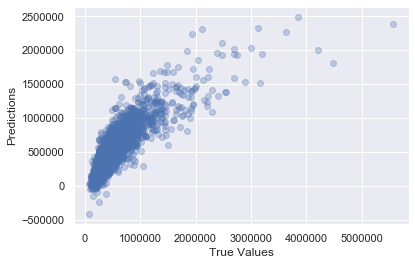

In [135]:
plt.scatter(y_test, y_test_pred, alpha=0.3)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [136]:
r2_test

0.7027786929887354

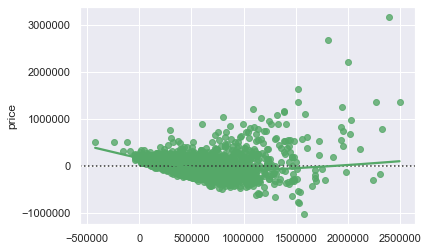

In [137]:
sns.residplot(y_test_pred, y_test, lowess=True, color="g")

#### Updated summary table of all models

In [138]:
summary_df = summary_df.append({'Model' : 'Multiple Regression-5', 'Description' : 'minus sqft_above 1st degree polynomial' , 'Root Mean Squared Error (RMSE)' : train_rmse, 'R-squared (training)' : r2_train, 'Adjusted R-squared (training)': adjusted_r2_train, 'R-squared (test)' : r2_test, 'Adjusted R-squared (test)' : adjusted_r2_test , '5-fold Cross Validation' : cv} , ignore_index=True)
summary_df

,Model,Description,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-fold Cross Validation
0,Multiple Regression-1,"All features, no pre-processing",206631.858,0.697,0.697,0.703,0.701,0.697
1,Multiple Regression-2,Minus sqft_above,206631.858,0.697,0.697,0.703,0.701,0.697
2,Multiple Regression-3,All features 1st degree polynomial,206631.858,0.697,0.697,0.703,0.701,0.697
3,Multiple Regression-4,"All features, 2nd degree polynomial",152321.069,0.835,0.833,0.812,0.801,0.697
4,Multiple Regression-5,minus sqft_above 1st degree polynomial,206631.858,0.697,0.697,0.703,0.701,0.697


### Multiple Regression - 6 (minus sft_above, polynomial 2nd degree)

In [139]:
target = df['price']
features = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view' , 'condition', 'grade', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']]

In [140]:
scaler.fit(features)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [141]:
features_scaled = scaler.transform(features)
features_scaled


array([[ 0.66806994,  0.17918873, -0.01246164, ...,  0.37101341,
         0.58706685, -0.19001514],
       [ 1.73267171,  1.15264072,  0.88972019, ..., -0.50223539,
         0.55786051, -0.24205974],
       [ 0.66806994,  0.50367273,  1.83538065, ...,  0.60529967,
         2.51468528, -0.11710863],
       ...,
       [-0.39653183, -1.44323124, -1.12116701, ..., -0.33894497,
        -0.33293285, -0.12746613],
       [-0.39653183, -0.79426325, -0.19724586, ...,  1.59214181,
         0.13436859,  3.49490383],
       [-0.39653183, -0.79426325, -0.81681651, ..., -0.74362124,
        -0.97547232, -0.21903083]])

#### Training data

In [142]:
# call train_test_split on the data and capture the results
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=42,test_size=0.2)

#check the shape of the results
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Training set - Features: ", X_test.shape, "Target: ",y_test.shape)


Training set - Features:  (13832, 17) Target:  (13832,)
Training set - Features:  (3458, 17) Target:  (3458,)


In [143]:
poly = PolynomialFeatures(2)
X_train = poly.fit_transform(X_train)
X_test = poly.fit_transform(X_test)

In [144]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Get coefficients

In [145]:
reg.coef_

array([ 6.14596643e+02,  1.13017623e+07, -2.16248940e+07,  3.47120918e+04,
       -1.20856059e+02, -4.76592602e+07,  9.89359891e+07, -2.46113755e+06,
       -2.55506536e+06, -1.00198979e+07, -5.76879529e+04,  1.57637812e+05,
        3.98027135e+04, -3.95199836e+05,  7.17200274e+07, -6.62938532e+07,
       -3.88727503e+03,  5.85876009e+02,  1.05242469e+03,  4.83171332e+03,
       -2.50575115e+01, -6.78116938e-02,  2.02918455e+04,  7.65687223e+03,
       -9.29323483e+02, -5.14139398e+03, -2.17680192e+03, -1.55047148e+00,
       -2.77513889e+02, -3.11196609e+00, -1.67554409e+01, -3.40006178e+04,
        6.12959488e+04,  1.47352128e+01,  2.89200387e-01,  5.23495524e+01,
        3.17323528e+01, -5.43892491e-01, -3.75625626e+04,  3.71644925e+04,
        7.86047580e+03, -7.26034398e+03,  1.44630758e+04, -4.10193222e+01,
        2.68522932e+02, -2.52946532e+01,  4.02823523e+01,  9.96227763e+04,
       -1.00966543e+05, -5.97902697e+00,  3.22179858e-01,  1.31664537e-02,
       -3.60562466e-04, -

#### Get intercept

In [146]:
reg.intercept_

13527507487.202368

#### Feature summary and weights

In [147]:
features_df = pd.DataFrame(data = features.columns.values, columns=['Features'])
features_df

,Features
0,bedrooms
1,bathrooms
2,sqft_living
3,sqft_lot
4,floors
5,waterfront
6,view
7,condition
8,grade
9,sqft_basement


In [148]:
p_values = f_regression(X_train,y_train)[1]
p_values

array([            nan, 1.10680784e-301, 0.00000000e+000, 0.00000000e+000,
       8.41668610e-024, 4.15765685e-208, 1.94648933e-238, 0.00000000e+000,
       2.37560983e-007, 0.00000000e+000, 0.00000000e+000, 5.33231772e-011,
       4.01878922e-043, 2.97836698e-010, 8.58462676e-285, 9.98917263e-003,
       0.00000000e+000, 1.17572027e-019, 7.10175942e-113, 0.00000000e+000,
       0.00000000e+000, 7.15736178e-046, 0.00000000e+000, 2.16489823e-301,
       0.00000000e+000, 4.07240661e-226, 0.00000000e+000, 0.00000000e+000,
       4.93190713e-303, 1.03594030e-066, 1.40122170e-301, 3.54686278e-308,
       9.80644110e-302, 0.00000000e+000, 1.19986234e-048, 0.00000000e+000,
       0.00000000e+000, 1.98159763e-080, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 7.87240225e-110, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 1.44944513e-081, 0.00000000e+000,
       2.07798246e-104, 0

#### Get r^2 score and adjusted r^2 score

In [149]:
r2_train = reg.score(X_train, y_train)
r2_train

0.8351014522237861

In [150]:
n = X_train.shape[0]
p = X_train.shape[1]

adjusted_r2_train = 1-(1-r2_train)*(n-1)/(n-p-1)
adjusted_r2_train

0.8330372024675832

#### Get error

In [151]:
y_train_pred = reg.predict(X_train)

In [152]:
train_mae = metrics.mean_absolute_error(y_train, y_train_pred)
train_mse = metrics.mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))

print('Mean Absolute Error:', train_mae )
print('Mean Squared Error:',  train_mse)
print('Root Mean Squared Error:' , train_rmse)

Mean Absolute Error: 99146.46555773132
Mean Squared Error: 23236942135.71074
Root Mean Squared Error: 152436.68238226237


In [153]:
price_std = target.std()

print('Mean Absolute Error:', train_mae/price_std )
print('Root Mean Squared Error:' , train_rmse/price_std)

Mean Absolute Error: 0.26558110142135916
Root Mean Squared Error: 0.4083282422258997


#### Test Data

In [154]:
reg.score(X_test, y_test)

0.8134314482151728

In [155]:
r2_test = reg.score(X_test, y_test)
n = X_test.shape[0]
p = X_test.shape[1]

adjusted_r2_test = 1-(1-r2_test)*(n-1)/(n-p-1)
adjusted_r2_test

0.8037226160924688

In [156]:
y_test_pred = reg.predict(X_test)

In [157]:
test_mae = metrics.mean_absolute_error(y_test, y_test_pred)
test_mse = metrics.mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

print('Mean Absolute Error:', test_mae )
print('Mean Squared Error:',  test_mse)
print('Root Mean Squared Error:' , test_rmse)

Mean Absolute Error: 100513.02130735782
Mean Squared Error: 24824204415.20728
Root Mean Squared Error: 157556.98783363204


In [158]:
print('Mean Absolute Error  Z:', test_mae/price_std )
print('Root Mean Squared Error Z:' , test_rmse/price_std)

Mean Absolute Error  Z: 0.2692416593555012
Root Mean Squared Error Z: 0.4220438734764834


In [159]:
cv = float(format(cross_val_score(reg,features,target,cv=5).mean(),'.3f'))
cv

0.697

Text(0, 0.5, 'Predictions')

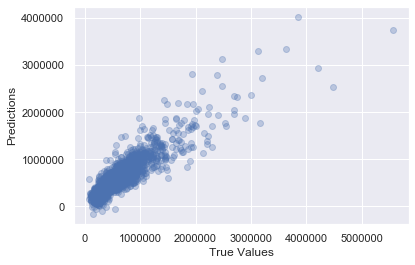

In [160]:
plt.scatter(y_test, y_test_pred, alpha=0.3)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [161]:
r2_test

0.8134314482151728

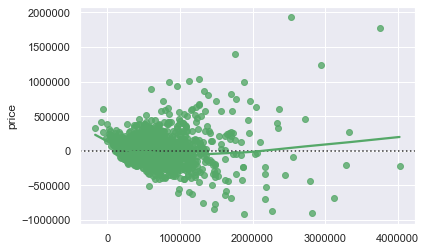

In [162]:
sns.residplot(y_test_pred, y_test, lowess=True, color="g")

#### Updated summary table of all models

In [163]:
summary_df = summary_df.append({'Model' : 'Multiple Regression-6', 'Description' : 'minus sqft_above, 2nd degree polynomial' , 'Root Mean Squared Error (RMSE)' : train_rmse, 'R-squared (training)' : r2_train, 'Adjusted R-squared (training)': adjusted_r2_train, 'R-squared (test)' : r2_test, 'Adjusted R-squared (test)' : adjusted_r2_test, '5-fold Cross Validation' : cv} , ignore_index=True)
summary_df

,Model,Description,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-fold Cross Validation
0,Multiple Regression-1,"All features, no pre-processing",206631.858,0.697,0.697,0.703,0.701,0.697
1,Multiple Regression-2,Minus sqft_above,206631.858,0.697,0.697,0.703,0.701,0.697
2,Multiple Regression-3,All features 1st degree polynomial,206631.858,0.697,0.697,0.703,0.701,0.697
3,Multiple Regression-4,"All features, 2nd degree polynomial",152321.069,0.835,0.833,0.812,0.801,0.697
4,Multiple Regression-5,minus sqft_above 1st degree polynomial,206631.858,0.697,0.697,0.703,0.701,0.697
5,Multiple Regression-6,"minus sqft_above, 2nd degree polynomial",152436.682,0.835,0.833,0.813,0.804,0.697


### Multiple Regression - 7 (all features, no outliers)

#### Clean data of outliers

In [164]:
price_top = df['price'].quantile(0.975)
lot_top = df['sqft_lot'].quantile(0.975)
bed_top = df['bedrooms'].quantile(0.975)
price_bottom = df['price'].quantile(0.025)
lot_bottom = df['sqft_lot'].quantile(0.025)
bed_bottom = df['bedrooms'].quantile(0.025)
clean_df = df[(df['price']<price_top) & (df['price']>price_bottom) & (df['bedrooms'] < bed_top) & (df['bedrooms'] > bed_bottom) & (df['sqft_lot'] < lot_top) & (df['sqft_lot'] > lot_bottom)] 

clean_df.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,12250.000,12250.000,12250.000,12250.000,12250.000,12250.000,12250.000,12250.000,12250.000,12250.000,...,12250.000,12250.000,12250.000,12250.000,12250.000,12250.000,12250.000,12250.000,12250.000,12250.000
mean,8638.187,4642329751.453,509146.797,3.416,2.139,2084.306,10496.454,1.493,0.003,0.195,...,7.688,1809.846,274.459,1972.913,77.786,98074.434,47.556,-122.205,2009.873,10288.316
std,5001.334,2872010912.981,239394.698,0.493,0.645,720.510,10503.708,0.518,0.056,0.684,...,1.032,710.657,404.107,27.669,386.471,53.180,0.143,0.138,621.903,13279.176
min,0.000,1200019.000,185850.000,3.000,0.500,660.000,1269.000,1.000,0.000,0.000,...,5.000,580.000,0.000,1900.000,0.000,98001.000,47.156,-122.509,399.000,660.000
25%,4305.250,2201500586.250,325000.000,3.000,1.750,1560.000,5400.000,1.000,0.000,0.000,...,7.000,1280.000,0.000,1955.000,0.000,98031.000,47.454,-122.319,1550.000,5440.000
50%,8629.500,4006000466.000,450000.000,3.000,2.250,1970.000,7744.500,1.500,0.000,0.000,...,7.000,1630.000,0.000,1977.000,0.000,98058.000,47.569,-122.209,1890.000,7724.500
75%,12952.500,7351150077.500,635000.000,4.000,2.500,2490.000,10450.000,2.000,0.000,0.000,...,8.000,2210.000,550.000,1995.000,0.000,98117.000,47.680,-122.118,2370.000,10000.000
max,17289.000,9900000190.000,1482500.000,4.000,5.250,6110.000,87117.000,3.500,1.000,4.000,...,12.000,6110.000,2330.000,2015.000,2015.000,98199.000,47.778,-121.321,5790.000,380279.000


In [165]:
clean_df.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,12250.000,12250.000,12250.000,12250.000,12250.000,12250.000,12250.000,12250.000,12250.000,12250.000,...,12250.000,12250.000,12250.000,12250.000,12250.000,12250.000,12250.000,12250.000,12250.000,12250.000
mean,8638.187,4642329751.453,509146.797,3.416,2.139,2084.306,10496.454,1.493,0.003,0.195,...,7.688,1809.846,274.459,1972.913,77.786,98074.434,47.556,-122.205,2009.873,10288.316
std,5001.334,2872010912.981,239394.698,0.493,0.645,720.510,10503.708,0.518,0.056,0.684,...,1.032,710.657,404.107,27.669,386.471,53.180,0.143,0.138,621.903,13279.176
min,0.000,1200019.000,185850.000,3.000,0.500,660.000,1269.000,1.000,0.000,0.000,...,5.000,580.000,0.000,1900.000,0.000,98001.000,47.156,-122.509,399.000,660.000
25%,4305.250,2201500586.250,325000.000,3.000,1.750,1560.000,5400.000,1.000,0.000,0.000,...,7.000,1280.000,0.000,1955.000,0.000,98031.000,47.454,-122.319,1550.000,5440.000
50%,8629.500,4006000466.000,450000.000,3.000,2.250,1970.000,7744.500,1.500,0.000,0.000,...,7.000,1630.000,0.000,1977.000,0.000,98058.000,47.569,-122.209,1890.000,7724.500
75%,12952.500,7351150077.500,635000.000,4.000,2.500,2490.000,10450.000,2.000,0.000,0.000,...,8.000,2210.000,550.000,1995.000,0.000,98117.000,47.680,-122.118,2370.000,10000.000
max,17289.000,9900000190.000,1482500.000,4.000,5.250,6110.000,87117.000,3.500,1.000,4.000,...,12.000,6110.000,2330.000,2015.000,2015.000,98199.000,47.778,-121.321,5790.000,380279.000


In [166]:
target = clean_df['price']
features = clean_df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view' , 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']]

In [167]:
scaler.fit(features)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [168]:
features_scaled = scaler.transform(features)
features_scaled


array([[ 1.18364657,  0.17251154, -0.01985568, ...,  0.31139846,
         0.61125742, -0.19492336],
       [ 1.18364657,  0.55991143,  2.33968049, ...,  0.55043766,
         2.73386177, -0.04543508],
       [-0.84484678,  0.55991143,  0.6463663 , ...,  0.88364382,
         0.38613271, -0.46980103],
       ...,
       [-0.84484678, -1.76448791, -1.43557738, ..., -0.41296277,
        -0.40180375, -0.06667221],
       [-0.84484678, -0.98968813, -0.2558093 , ...,  1.55729976,
         0.112767  ,  7.36067329],
       [-0.84484678, -0.98968813, -1.0469479 , ..., -0.82584867,
        -1.10933854, -0.25441743]])

#### Training data

In [169]:
# call train_test_split on the data and capture the results
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=42,test_size=0.2)

#check the shape of the results
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Training set - Features: ", X_test.shape, "Target: ",y_test.shape)


Training set - Features:  (9800, 18) Target:  (9800,)
Training set - Features:  (2450, 18) Target:  (2450,)


In [170]:
# poly = PolynomialFeatures(2)
# X_train = poly.fit_transform(X_train)
# X_test = poly.fit_transform(X_test)

In [171]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Get coefficients

In [172]:
reg.coef_

array([-1.18703737e+04,  2.63357160e+04,  5.85793880e+01, -8.67308270e-01,
        3.08910806e+04,  2.13992482e+05,  4.08856458e+04,  2.89178042e+04,
        8.58978746e+04,  2.65545208e+01,  3.20248672e+01, -2.16769836e+03,
        2.00498475e+01, -2.89008620e+02,  5.58901578e+05, -5.72681644e+04,
        4.93800122e+01, -8.36383152e-02])

#### Get intercept

In [173]:
reg.intercept_

-1547411.9792438454

#### Feature summary and weights

In [174]:
features_df = pd.DataFrame(data = features.columns.values, columns=['Features'])
features_df

,Features
0,bedrooms
1,bathrooms
2,sqft_living
3,sqft_lot
4,floors
5,waterfront
6,view
7,condition
8,grade
9,sqft_above


In [175]:
p_values = f_regression(X_train,y_train)[1]
p_values

array([6.61099089e-141, 0.00000000e+000, 0.00000000e+000, 9.65946177e-034,
       4.05468110e-162, 3.76348080e-019, 2.24657653e-216, 8.05040873e-003,
       0.00000000e+000, 0.00000000e+000, 3.45384964e-120, 8.86009410e-001,
       4.02615598e-025, 1.07087842e-006, 0.00000000e+000, 8.74328131e-001,
       0.00000000e+000, 1.68285262e-014])

#### Get r^2 score and adjusted r^2 score

In [176]:
r2_train = reg.score(X_train, y_train)
r2_train

0.7052705772050547

In [177]:
n = X_train.shape[0]
p = X_train.shape[1]

adjusted_r2_train = 1-(1-r2_train)*(n-1)/(n-p-1)
adjusted_r2_train

0.7047281858738709

#### Get error

In [178]:
y_train_pred = reg.predict(X_train)

In [179]:
train_mae = metrics.mean_absolute_error(y_train, y_train_pred)
train_mse = metrics.mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))

print('Mean Absolute Error:', train_mae )
print('Mean Squared Error:',  train_mse)
print('Root Mean Squared Error:' , train_rmse)

Mean Absolute Error: 94354.74619155288
Mean Squared Error: 16721836422.268602
Root Mean Squared Error: 129312.93988719227


In [180]:
price_std = target.std()

print('Mean Absolute Error:', train_mae/price_std )
print('Root Mean Squared Error:' , train_rmse/price_std)

Mean Absolute Error: 0.39413883063501665
Root Mean Squared Error: 0.5401662658245485


#### Test Data

In [181]:
reg.score(X_test, y_test)

0.7110863014417543

In [182]:
r2_test = reg.score(X_test, y_test)
n = X_test.shape[0]
p = X_test.shape[1]

adjusted_r2_test = 1-(1-r2_test)*(n-1)/(n-p-1)
adjusted_r2_test

0.7089470803088673

In [183]:
y_test_pred = reg.predict(X_test)

In [184]:
test_mae = metrics.mean_absolute_error(y_test, y_test_pred)
test_mse = metrics.mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

print('Mean Absolute Error:', test_mae )
print('Mean Squared Error:',  test_mse)
print('Root Mean Squared Error:' , test_rmse)

Mean Absolute Error: 95732.44138239035
Mean Squared Error: 17160770240.770124
Root Mean Squared Error: 130999.12305343927


In [185]:
print('Mean Absolute Error  Z:', test_mae/price_std )
print('Root Mean Squared Error Z:' , test_rmse/price_std)

Mean Absolute Error  Z: 0.3998937416851274
Root Mean Squared Error Z: 0.5472097934498769


In [186]:
cv = float(format(cross_val_score(reg,features,target,cv=5).mean(),'.3f'))
cv

0.705

Text(0, 0.5, 'Predictions')

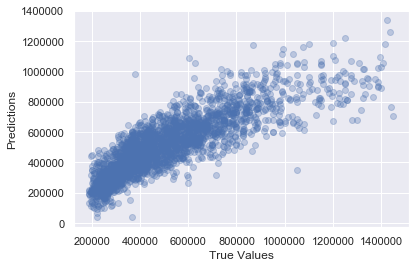

In [187]:
plt.scatter(y_test, y_test_pred, alpha=0.3)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [188]:
r2_test

0.7110863014417543

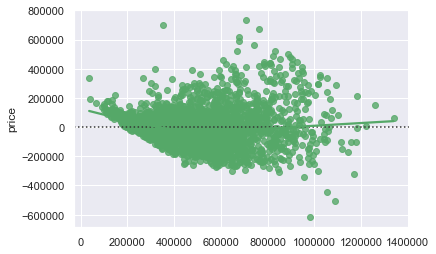

In [189]:
sns.residplot(y_test_pred, y_test, lowess=True, color="g")

#### Updated summary table of all models

In [190]:
summary_df = summary_df.append({'Model' : 'Multiple Regression-7', 'Description' : 'all features: minus outliers' , 'Root Mean Squared Error (RMSE)' : train_rmse, 'R-squared (training)' : r2_train, 'Adjusted R-squared (training)': adjusted_r2_train, 'R-squared (test)' : r2_test, 'Adjusted R-squared (test)' : adjusted_r2_test, '5-fold Cross Validation' : cv} , ignore_index=True)
summary_df

,Model,Description,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-fold Cross Validation
0,Multiple Regression-1,"All features, no pre-processing",206631.858,0.697,0.697,0.703,0.701,0.697
1,Multiple Regression-2,Minus sqft_above,206631.858,0.697,0.697,0.703,0.701,0.697
2,Multiple Regression-3,All features 1st degree polynomial,206631.858,0.697,0.697,0.703,0.701,0.697
3,Multiple Regression-4,"All features, 2nd degree polynomial",152321.069,0.835,0.833,0.812,0.801,0.697
4,Multiple Regression-5,minus sqft_above 1st degree polynomial,206631.858,0.697,0.697,0.703,0.701,0.697
5,Multiple Regression-6,"minus sqft_above, 2nd degree polynomial",152436.682,0.835,0.833,0.813,0.804,0.697
6,Multiple Regression-7,all features: minus outliers,129312.940,0.705,0.705,0.711,0.709,0.705


### Multiple Regression - 8 (all features, no outliers, 2nd degree polynomial)

#### Clean data of outliers

In [191]:
# q = df['price'].quantile(0.99)
# clean_df = df[df['price']<q]http://localhost:8964/notebooks/bryan_index.ipynb#
# clean_df.describe()

# q = clean_df['sqft_lot'].quantile(0.99)
# clean_df = clean_df[clean_df['sqft_lot']<q]
# clean_df.describe()

In [192]:
target = clean_df['price']
features = clean_df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view' , 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']]

In [193]:
scaler.fit(features)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [194]:
features_scaled = scaler.transform(features)
features_scaled


array([[ 1.18364657,  0.17251154, -0.01985568, ...,  0.31139846,
         0.61125742, -0.19492336],
       [ 1.18364657,  0.55991143,  2.33968049, ...,  0.55043766,
         2.73386177, -0.04543508],
       [-0.84484678,  0.55991143,  0.6463663 , ...,  0.88364382,
         0.38613271, -0.46980103],
       ...,
       [-0.84484678, -1.76448791, -1.43557738, ..., -0.41296277,
        -0.40180375, -0.06667221],
       [-0.84484678, -0.98968813, -0.2558093 , ...,  1.55729976,
         0.112767  ,  7.36067329],
       [-0.84484678, -0.98968813, -1.0469479 , ..., -0.82584867,
        -1.10933854, -0.25441743]])

#### Training data

In [195]:
# call train_test_split on the data and capture the results
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=42,test_size=0.2)

#check the shape of the results
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Training set - Features: ", X_test.shape, "Target: ",y_test.shape)


Training set - Features:  (9800, 18) Target:  (9800,)
Training set - Features:  (2450, 18) Target:  (2450,)


In [196]:
poly = PolynomialFeatures(2)
X_train = poly.fit_transform(X_train)
X_test = poly.fit_transform(X_test)

In [197]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Get coefficients

In [198]:
reg.coef_

array([-1.82862100e+04,  7.16042429e+04,  2.20599665e+06, -1.50482894e+04,
       -5.58200825e+02, -1.93663839e+07, -4.33119994e+07,  2.71592207e+06,
        2.39334715e+06, -1.04222638e+07,  1.01191456e+04, -1.46289214e+04,
       -1.54203738e+05,  2.32200748e+04, -5.58461222e+05,  1.01283773e+08,
        2.19264047e+08,  2.97170991e+03,  1.17050493e+03,  5.65819083e+05,
        2.75445020e+03,  3.26377092e+01,  8.34712779e-01,  9.07195949e+03,
        1.66302036e+05,  7.31804455e+01, -7.40550508e+03,  7.04235370e+03,
       -3.21801262e+01, -3.03619902e+01, -1.31490915e+02, -6.51660204e+00,
       -6.72152551e+01,  2.84873201e+04, -1.15388538e+04, -1.59591668e+00,
       -4.41175499e-01,  2.11682281e+03,  3.13168941e+00,  5.73663562e-01,
       -1.65786640e+04, -6.64382480e+04,  2.29389049e+02, -9.92258885e+03,
        1.07635865e+04, -4.03296876e+00,  9.83522347e+00,  3.19823928e+01,
        8.40603323e+00, -1.87200613e+00,  3.07138595e+03,  1.84957815e+04,
       -2.24854348e+00, -

#### Get intercept

In [199]:
reg.intercept_

38588687738.95149

#### Feature summary and weights

In [200]:
features_df = pd.DataFrame(data = features.columns.values, columns=['Features'])
features_df

,Features
0,bedrooms
1,bathrooms
2,sqft_living
3,sqft_lot
4,floors
5,waterfront
6,view
7,condition
8,grade
9,sqft_above


In [201]:
p_values = f_regression(X_train,y_train)[1]
p_values

array([            nan, 6.61099089e-141, 0.00000000e+000, 0.00000000e+000,
       9.65946177e-034, 4.05468110e-162, 3.76348080e-019, 2.24657653e-216,
       8.05040873e-003, 0.00000000e+000, 0.00000000e+000, 3.45384964e-120,
       8.86009410e-001, 4.02615598e-025, 1.07087842e-006, 0.00000000e+000,
       8.74328130e-001, 0.00000000e+000, 1.68285262e-014, 6.61099089e-141,
       0.00000000e+000, 0.00000000e+000, 1.81625459e-057, 1.33428605e-244,
       1.39213933e-018, 6.51459467e-226, 2.42256763e-067, 0.00000000e+000,
       0.00000000e+000, 2.85084125e-130, 2.64379035e-137, 1.51653979e-027,
       3.81111826e-141, 1.59958748e-151, 5.96077856e-141, 0.00000000e+000,
       3.92155807e-030, 0.00000000e+000, 0.00000000e+000, 2.53739742e-133,
       0.00000000e+000, 4.21358765e-022, 1.24295228e-258, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 7.54706667e-203, 0.00000000e+000,
       1.57740049e-045, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 1

In [202]:
# features2_df['Weights'] = reg.coef_
# features2_df['P Values'] = p_values.round(3)
# features2_df.sort_values(['Weights'], ascending=False)

#### Get r^2 score and adjusted r^2 score

In [203]:
r2_train = reg.score(X_train, y_train)
r2_train

0.7887677693364026

In [204]:
n = X_train.shape[0]
p = X_train.shape[1]

adjusted_r2_train = 1-(1-r2_train)*(n-1)/(n-p-1)
adjusted_r2_train

0.7845910471149349

#### Get error

In [205]:
y_train_pred = reg.predict(X_train)

In [206]:
train_mae = metrics.mean_absolute_error(y_train, y_train_pred)
train_mse = metrics.mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))

print('Mean Absolute Error:', train_mae )
print('Mean Squared Error:',  train_mse)
print('Root Mean Squared Error:' , train_rmse)

Mean Absolute Error: 79534.56691186632
Mean Squared Error: 11984520496.024822
Root Mean Squared Error: 109473.83475527301


In [207]:
price_std = target.std()

print('Mean Absolute Error:', train_mae/price_std )
print('Root Mean Squared Error:' , train_rmse/price_std)

Mean Absolute Error: 0.3322319487147524
Root Mean Squared Error: 0.4572943170021178


#### Test Data

In [208]:
reg.score(X_test, y_test)

0.7821105943466011

In [209]:
r2_test = reg.score(X_test, y_test)
n = X_test.shape[0]
p = X_test.shape[1]

adjusted_r2_test = 1-(1-r2_test)*(n-1)/(n-p-1)
adjusted_r2_test

0.7637843495151952

In [210]:
y_test_pred = reg.predict(X_test)

In [211]:
test_mae = metrics.mean_absolute_error(y_test, y_test_pred)
test_mse = metrics.mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

print('Mean Absolute Error:', test_mae )
print('Mean Squared Error:',  test_mse)
print('Root Mean Squared Error:' , test_rmse)

Mean Absolute Error: 81873.12919527326
Mean Squared Error: 12942100173.772532
Root Mean Squared Error: 113763.3516286002


In [212]:
print('Mean Absolute Error  Z:', test_mae/price_std )
print('Root Mean Squared Error Z:' , test_rmse/price_std)

Mean Absolute Error  Z: 0.3420005956663107
Root Mean Squared Error Z: 0.47521249528866705


In [213]:
cv = float(format(cross_val_score(reg,features,target,cv=5).mean(),'.3f'))
cv

0.705

Text(0, 0.5, 'Predictions')

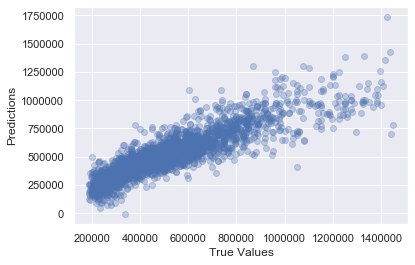

In [214]:
plt.scatter(y_test, y_test_pred, alpha=0.3)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [215]:
r2_test

0.7821105943466011

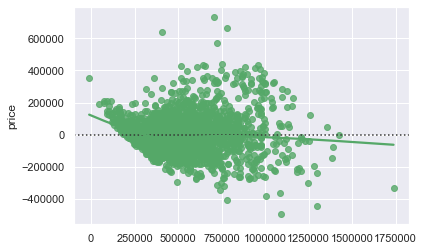

In [216]:
sns.residplot(y_test_pred, y_test, lowess=True, color="g")

#### Updated summary table of all models

In [217]:
summary_df = summary_df.append({'Model' : 'Multiple Regression-8', 'Description' : 'all features, no outliers, 2nd degree polynomial' , 'Root Mean Squared Error (RMSE)' : train_rmse, 'R-squared (training)' : r2_train, 'Adjusted R-squared (training)': adjusted_r2_train, 'R-squared (test)' : r2_test, 'Adjusted R-squared (test)' : adjusted_r2_test, '5-fold Cross Validation' : cv} , ignore_index=True)
summary_df

,Model,Description,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-fold Cross Validation
0,Multiple Regression-1,"All features, no pre-processing",206631.858,0.697,0.697,0.703,0.701,0.697
1,Multiple Regression-2,Minus sqft_above,206631.858,0.697,0.697,0.703,0.701,0.697
2,Multiple Regression-3,All features 1st degree polynomial,206631.858,0.697,0.697,0.703,0.701,0.697
3,Multiple Regression-4,"All features, 2nd degree polynomial",152321.069,0.835,0.833,0.812,0.801,0.697
4,Multiple Regression-5,minus sqft_above 1st degree polynomial,206631.858,0.697,0.697,0.703,0.701,0.697
5,Multiple Regression-6,"minus sqft_above, 2nd degree polynomial",152436.682,0.835,0.833,0.813,0.804,0.697
6,Multiple Regression-7,all features: minus outliers,129312.940,0.705,0.705,0.711,0.709,0.705
7,Multiple Regression-8,"all features, no outliers, 2nd degree polynomial",109473.835,0.789,0.785,0.782,0.764,0.705


### Multiple Regression - 9 (minus sqft_above, no outliers, 2nd degree polynomial)

#### Clean data of outliers

In [218]:
# q = df['price'].quantile(0.99)
# clean_df = df[df['price']<q]http://localhost:8964/notebooks/bryan_index.ipynb#
# clean_df.describe()

# q = clean_df['sqft_lot'].quantile(0.99)
# clean_df = clean_df[clean_df['sqft_lot']<q]
# clean_df.describe()

In [219]:
target = clean_df['price']
features = clean_df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view' , 'condition', 'grade', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']]

In [220]:
scaler.fit(features)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [221]:
features_scaled = scaler.transform(features)
features_scaled


array([[ 1.18364657,  0.17251154, -0.01985568, ...,  0.31139846,
         0.61125742, -0.19492336],
       [ 1.18364657,  0.55991143,  2.33968049, ...,  0.55043766,
         2.73386177, -0.04543508],
       [-0.84484678,  0.55991143,  0.6463663 , ...,  0.88364382,
         0.38613271, -0.46980103],
       ...,
       [-0.84484678, -1.76448791, -1.43557738, ..., -0.41296277,
        -0.40180375, -0.06667221],
       [-0.84484678, -0.98968813, -0.2558093 , ...,  1.55729976,
         0.112767  ,  7.36067329],
       [-0.84484678, -0.98968813, -1.0469479 , ..., -0.82584867,
        -1.10933854, -0.25441743]])

#### Training data

In [222]:
# call train_test_split on the data and capture the results
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=42,test_size=0.2)

#check the shape of the results
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Training set - Features: ", X_test.shape, "Target: ",y_test.shape)


Training set - Features:  (9800, 17) Target:  (9800,)
Training set - Features:  (2450, 17) Target:  (2450,)


In [223]:
poly = PolynomialFeatures(2)
X_train = poly.fit_transform(X_train)
X_test = poly.fit_transform(X_test)

In [224]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Get coefficients

In [225]:
reg.coef_

array([-1.84062080e+04,  7.61717564e+04,  2.20584892e+06, -4.92915163e+03,
       -5.58636644e+02, -1.93664297e+07, -4.33641573e+07,  2.71635919e+06,
        2.39331930e+06, -1.04224097e+07, -2.47478126e+04, -1.54197705e+05,
        2.32204453e+04, -5.58466283e+05,  1.01283215e+08,  2.19262143e+08,
        2.97191195e+03,  1.17004249e+03,  5.65152566e+05,  2.75441764e+03,
        4.49734280e-01,  8.34871848e-01,  9.07063156e+03,  1.66280917e+05,
        7.28057518e+01, -7.40564184e+03,  7.04249240e+03,  1.84083599e+00,
       -1.31169532e+02, -6.47811811e+00, -6.72190501e+01,  2.84850773e+04,
       -1.15380902e+04, -1.58930090e+00, -4.41435769e-01,  2.11618355e+03,
       -9.16006569e-01,  5.73285524e-01, -1.65784782e+04, -6.64632336e+04,
        2.29477204e+02, -9.92266428e+03,  1.07634472e+04,  1.38597263e+01,
        3.15832519e+01,  8.34306104e+00, -1.86382126e+00,  3.07071164e+03,
        1.84943227e+04, -2.23061857e+00, -5.45452429e-01, -9.77239944e-03,
       -3.34294513e-04,  

#### Get intercept

In [226]:
reg.intercept_

38588827371.56749

#### Feature summary and weights

In [227]:
features_df = pd.DataFrame(data = features.columns.values, columns=['Features'])
features_df

,Features
0,bedrooms
1,bathrooms
2,sqft_living
3,sqft_lot
4,floors
5,waterfront
6,view
7,condition
8,grade
9,sqft_basement


In [228]:
p_values = f_regression(X_train,y_train)[1]
p_values

array([            nan, 6.61099089e-141, 0.00000000e+000, 0.00000000e+000,
       9.65946177e-034, 4.05468110e-162, 3.76348080e-019, 2.24657653e-216,
       8.05040873e-003, 0.00000000e+000, 3.45384964e-120, 8.86009410e-001,
       4.02615598e-025, 1.07087842e-006, 0.00000000e+000, 8.74328130e-001,
       0.00000000e+000, 1.68285262e-014, 6.61099089e-141, 0.00000000e+000,
       0.00000000e+000, 1.81625459e-057, 1.33428605e-244, 1.39213933e-018,
       6.51459467e-226, 2.42256763e-067, 0.00000000e+000, 2.85084125e-130,
       2.64379035e-137, 1.51653979e-027, 3.81111826e-141, 1.59958748e-151,
       5.96077856e-141, 0.00000000e+000, 3.92155807e-030, 0.00000000e+000,
       0.00000000e+000, 2.53739742e-133, 0.00000000e+000, 4.21358765e-022,
       1.24295228e-258, 0.00000000e+000, 0.00000000e+000, 7.54706667e-203,
       0.00000000e+000, 1.57740049e-045, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 1.06343930e-080, 0.00000000e+000,
       2.80799811e-193, 0

In [229]:
# features2_df['Weights'] = reg.coef_
# features2_df['P Values'] = p_values.round(3)
# features2_df.sort_values(['Weights'], ascending=False)

#### Get r^2 score and adjusted r^2 score

In [230]:
r2_train = reg.score(X_train, y_train)
r2_train

0.7887677563304701

In [231]:
n = X_train.shape[0]
p = X_train.shape[1]

adjusted_r2_train = 1-(1-r2_train)*(n-1)/(n-p-1)
adjusted_r2_train

0.7850161242503404

#### Get error

In [232]:
y_train_pred = reg.predict(X_train)

In [233]:
train_mae = metrics.mean_absolute_error(y_train, y_train_pred)
train_mse = metrics.mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))

print('Mean Absolute Error:', train_mae )
print('Mean Squared Error:',  train_mse)
print('Root Mean Squared Error:' , train_rmse)

Mean Absolute Error: 79534.45265067431
Mean Squared Error: 11984521233.932398
Root Mean Squared Error: 109473.83812551928


In [234]:
price_std = target.std()

print('Mean Absolute Error:', train_mae/price_std )
print('Root Mean Squared Error:' , train_rmse/price_std)

Mean Absolute Error: 0.33223147142267734
Root Mean Squared Error: 0.4572943310803171


#### Test Data

In [235]:
reg.score(X_test, y_test)

0.7821035221052286

In [236]:
r2_test = reg.score(X_test, y_test)
n = X_test.shape[0]
p = X_test.shape[1]

adjusted_r2_test = 1-(1-r2_test)*(n-1)/(n-p-1)
adjusted_r2_test

0.7657469383826624

In [237]:
y_test_pred = reg.predict(X_test)

In [238]:
test_mae = metrics.mean_absolute_error(y_test, y_test_pred)
test_mse = metrics.mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

print('Mean Absolute Error:', test_mae )
print('Mean Squared Error:',  test_mse)
print('Root Mean Squared Error:' , test_rmse)

Mean Absolute Error: 81875.26947988394
Mean Squared Error: 12942520247.690407
Root Mean Squared Error: 113765.19787567024


In [239]:
print('Mean Absolute Error  Z:', test_mae/price_std )
print('Root Mean Squared Error Z:' , test_rmse/price_std)

Mean Absolute Error  Z: 0.34200953606737927
Root Mean Squared Error Z: 0.4752202074355449


In [240]:
cv = float(format(cross_val_score(reg,features,target,cv=5).mean(),'.3f'))
cv

0.705

Text(0, 0.5, 'Predictions')

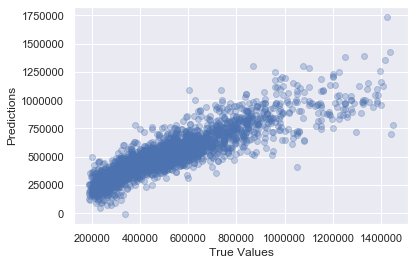

In [241]:
plt.scatter(y_test, y_test_pred, alpha=0.3)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [242]:
r2_test

0.7821035221052286

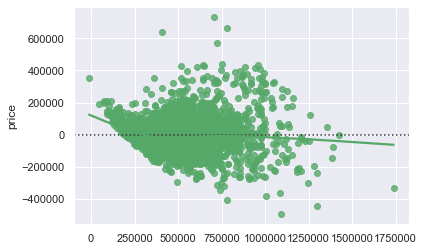

In [243]:
sns.residplot(y_test_pred, y_test, lowess=True, color="g")

#### Updated summary table of all models

In [244]:
summary_df = summary_df.append({'Model' : 'Multiple Regression-9', 'Description' : 'without sqft_above, no outliers, 2nd degree polynomial' , 'Root Mean Squared Error (RMSE)' : train_rmse, 'R-squared (training)' : r2_train, 'Adjusted R-squared (training)': adjusted_r2_train, 'R-squared (test)' : r2_test, 'Adjusted R-squared (test)' : adjusted_r2_test, '5-fold Cross Validation' : cv} , ignore_index=True)
summary_df

,Model,Description,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-fold Cross Validation
0,Multiple Regression-1,"All features, no pre-processing",206631.858,0.697,0.697,0.703,0.701,0.697
1,Multiple Regression-2,Minus sqft_above,206631.858,0.697,0.697,0.703,0.701,0.697
2,Multiple Regression-3,All features 1st degree polynomial,206631.858,0.697,0.697,0.703,0.701,0.697
3,Multiple Regression-4,"All features, 2nd degree polynomial",152321.069,0.835,0.833,0.812,0.801,0.697
4,Multiple Regression-5,minus sqft_above 1st degree polynomial,206631.858,0.697,0.697,0.703,0.701,0.697
5,Multiple Regression-6,"minus sqft_above, 2nd degree polynomial",152436.682,0.835,0.833,0.813,0.804,0.697
6,Multiple Regression-7,all features: minus outliers,129312.940,0.705,0.705,0.711,0.709,0.705
7,Multiple Regression-8,"all features, no outliers, 2nd degree polynomial",109473.835,0.789,0.785,0.782,0.764,0.705
8,Multiple Regression-9,"without sqft_above, no outliers, 2nd degree po...",109473.838,0.789,0.785,0.782,0.766,0.705


In [245]:
test_df = pd.read_csv("kc_house_data_test_features.csv", index_col=0)

In [246]:
test_df

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,1974300020,20140827T000000,4,2.500,2270,11500,1.000,0,0,3,8,1540,730,1967,0,98034,47.709,-122.241,2020,10918
1,1974300020,20150218T000000,4,2.500,2270,11500,1.000,0,0,3,8,1540,730,1967,0,98034,47.709,-122.241,2020,10918
2,3630020380,20141107T000000,3,2.500,1470,1779,2.000,0,0,3,8,1160,310,2005,0,98029,47.547,-121.998,1470,1576
3,1771000290,20141203T000000,3,1.750,1280,16200,1.000,0,0,3,8,1030,250,1976,0,98077,47.743,-122.071,1160,10565
4,5126310470,20150115T000000,4,2.750,2830,8126,2.000,0,0,3,8,2830,0,2005,0,98059,47.486,-122.140,2830,7916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4318,263000018,20140521T000000,3,2.500,1530,1131,3.000,0,0,3,8,1530,0,2009,0,98103,47.699,-122.346,1530,1509
4319,6600060120,20150223T000000,4,2.500,2310,5813,2.000,0,0,3,8,2310,0,2014,0,98146,47.511,-122.362,1830,7200
4320,1523300141,20140623T000000,2,0.750,1020,1350,2.000,0,0,3,7,1020,0,2009,0,98144,47.594,-122.299,1020,2007
4321,291310100,20150116T000000,3,2.500,1600,2388,2.000,0,0,3,8,1600,0,2004,0,98027,47.535,-122.069,1410,1287


In [247]:
del test_df['date']

In [248]:
test_df.shape

(4323, 19)

In [249]:
main_df = pd.read_csv("kc_house_data.csv", index_col=0)

In [250]:
#result_df = pd.merge(test_df, main_df[['id','price']],on='id', how='left')
result_df = pd.merge(test_df, main_df.iloc[:, [1]], how='left', on='id')


In [251]:
result_df.shape

(4371, 20)

In [252]:
result_df.to_csv (r'test_df_prices.csv', index = False, header=True)

In [253]:
result_df.drop_duplicates('id', inplace = True, keep='first')

In [254]:
result_df.shape

(4300, 20)

In [255]:
target2 = result_df['price']
features2 = result_df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view' , 'condition', 'grade', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']]

In [256]:
target2.shape

(4300,)

In [257]:
features2

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,4,2.500,2270,11500,1.000,0,0,3,8,730,1967,0,98034,47.709,-122.241,2020,10918
4,3,2.500,1470,1779,2.000,0,0,3,8,310,2005,0,98029,47.547,-121.998,1470,1576
5,3,1.750,1280,16200,1.000,0,0,3,8,250,1976,0,98077,47.743,-122.071,1160,10565
6,4,2.750,2830,8126,2.000,0,0,3,8,0,2005,0,98059,47.486,-122.140,2830,7916
7,4,2.250,1970,7125,1.500,0,0,3,7,470,1908,0,98115,47.672,-122.293,1980,4750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4366,3,2.500,1530,1131,3.000,0,0,3,8,0,2009,0,98103,47.699,-122.346,1530,1509
4367,4,2.500,2310,5813,2.000,0,0,3,8,0,2014,0,98146,47.511,-122.362,1830,7200
4368,2,0.750,1020,1350,2.000,0,0,3,7,0,2009,0,98144,47.594,-122.299,1020,2007
4369,3,2.500,1600,2388,2.000,0,0,3,8,0,2004,0,98027,47.535,-122.069,1410,1287


In [259]:
predictions = reg.predict(poly.fit_transform(features2))

In [260]:
predictions.shape

(4300,)

In [ ]:
X_test.shape

In [ ]:
result = reg.predict(X_test)

In [261]:
reg.score(poly.fit_transform(test_df), predictions)

ValueError: shapes (4323,210) and (171,) not aligned: 210 (dim 1) != 171 (dim 0)

In [ ]:
x = poly.fit_transform(test_df).reshape(-1, 1)
x.shape

In [262]:
test_mae = metrics.mean_absolute_error(target2, predictions)
test_mse = metrics.mean_squared_error(target2, predictions)
test_rmse = np.sqrt(metrics.mean_squared_error(target2, predictions))

print('Mean Absolute Error:', test_mae )
print('Mean Squared Error:',  test_mse)
print('Root Mean Squared Error:' , test_rmse)

Mean Absolute Error: 424901.758045303
Mean Squared Error: 1052671351619.4155
Root Mean Squared Error: 1025997.7347048167


In [ ]:
result_df["predictions"] = predictions

In [ ]:
result_df.to_csv (r'test_df_prices.csv', index = False, header=True)